### AI in Speech Processing_Lab03 

### BL.EN.U4AIE21099 
### Perumalla Dinesh Saravan

In [14]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import IPython.display as ipd
import numpy as np

### A1.

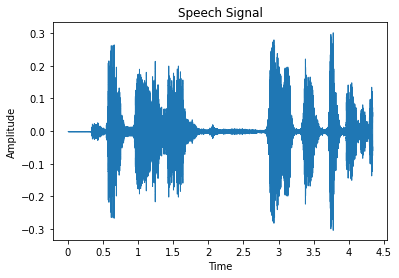

In [15]:
y, sr = librosa.load('AI_IN_speechprocessing.wav')
librosa.display.waveshow(y)
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

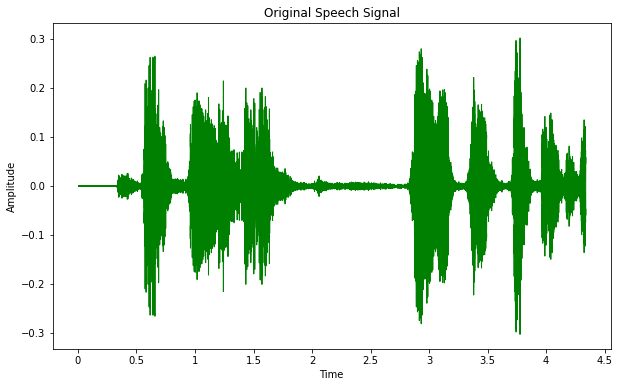

In [16]:
# Plotting the Original speech signal
import librosa
import matplotlib.pyplot as plt

# Load the audio file
audio, sample_rate = librosa.load('AI_IN_speechprocessing.wav')

# Display the original speech signal 
plt.figure(figsize=(10, 6))
librosa.display.waveshow(audio, sr=sample_rate, color='green')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

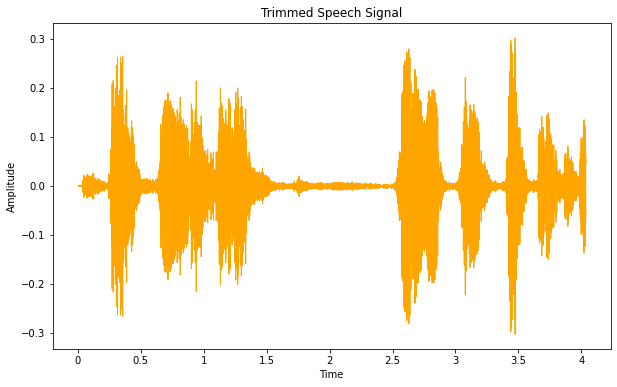

In [17]:
# Trim the silent parts from the beginning and end of the signal and plot the trimmed signal
y_trimmed_audio,index= librosa.effects.trim(y)

# Display the original speech signal 
plt.figure(figsize=(10, 6))
librosa.display.waveshow(y_trimmed_audio, sr=sample_rate, color='orange')
plt.title('Trimmed Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [18]:
# Comparing the audio's of trimmed and Original audio signal
import IPython.display as ipd

print("Trimmed Speech Signal")
ipd.Audio(data=y_trimmed_audio,rate=sample_rate)

Trimmed Speech Signal


In [19]:
print("Original Speech Signal")
ipd.Audio(data=audio,rate=sample_rate)

Original Speech Signal


### A2. 

In [37]:
import librosa
from IPython.display import Audio

# Load the audio file 
audio_data, sample_rate = librosa.load('AI_IN_speechprocessing.wav')

# Split the audio into segments based on silence 
audio_segments = librosa.effects.split(audio_data, top_db=5)

num_segments = min(5, len(audio_segments))
end_idx_previous = 0

for i in range(num_segments):
    segment_bounds = audio_segments[i]
    start_idx, end_idx = segment_bounds
    
    if i > 0 and start_idx - end_idx_previous < sample_rate * 0.1:
        continue
    
# Extract the segment audio
    segment_audio = audio_data[start_idx:end_idx]
    print(f"Playing Segment {i+1}: Duration {len(segment_audio)/sample_rate} seconds")
    display(Audio(segment_audio, rate=sample_rate))
    end_idx_previous = end_idx

Playing Segment 1: Duration 0.11609977324263039 seconds


Playing Segment 2: Duration 0.09287981859410431 seconds


Playing Segment 3: Duration 0.046439909297052155 seconds


Playing Segment 4: Duration 0.18575963718820862 seconds


Playing Segment 5: Duration 0.3250793650793651 seconds


## A3

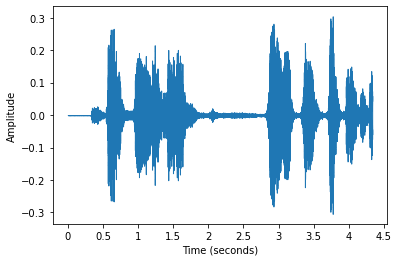

(513, 407)


80.0

In [40]:
signal, sr = librosa.load("AI_IN_speechprocessing.wav", sr=None)
from librosa import display
import matplotlib.pyplot as plt 
plt.figure()
librosa.display.waveshow(y=signal, sr=sr) 
plt.xlabel("Time (seconds)") 
plt.ylabel("Amplitude") 
plt.show()

n_fft = 1024
S= librosa.stft(signal, n_fft=n_fft, hop_length=n_fft//2)
print(S.shape)
D = librosa.amplitude_to_db(np.abs(S), ref=np.max) 
np.max(abs(D))


In [41]:
no_mute = librosa.effects.split(signal)
no_mute

array([[ 14848, 208008]])

In [42]:
def displayTime(startFrame, endFrame):    
    print(' start time: ' + str(startFrame/sr) + ', end time: ' + str(endFrame/sr))
for i in no_mute:
    displayTime(i[0],i[1])

 start time: 0.30933333333333335, end time: 4.3335


 start time: 0.30933333333333335, end time: 4.3335


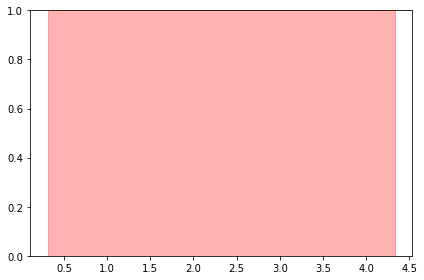

In [46]:
for i, (start, end) in enumerate(no_mute):
    displayTime(start, end)
    if i % 2 == 0:
        plt.axvspan(start/sr, end/sr, color='red', alpha=0.3)  # Plot silence segments in blue
    else:
        plt.axvspan(start/sr, end/sr, color='pink', alpha=0.3)  # Plot non-silence segments in orange

plt.tight_layout()
plt.show()

C:\Users\dines\AppData\Local\Temp\ipykernel_23748\3672693506.py:4: RuntimeWarning: divide by zero encountered in log10
  signal_db = 10 * np.log10(np.abs(signal) / max_amplitude)


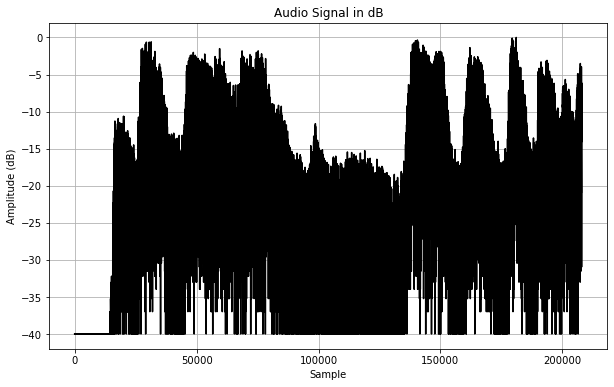

In [47]:
max_amplitude = np.max(np.abs(signal))

# Convert amplitude to dB
signal_db = 10 * np.log10(np.abs(signal) / max_amplitude)

# Plot the dB representation of the signal
plt.figure(figsize=(10, 6))
plt.plot(signal_db, color='black')
plt.xlabel('Sample')
plt.ylabel('Amplitude (dB)')
plt.title('Audio Signal in dB')
plt.grid(True)
plt.show()